# 資産レポート

In [1]:
import sys
sys.path.append('../')
%cd '..'

/home/tsu-nera/repo/bakuchi


In [2]:
import src.utils.asset as tool

%reload_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import japanize_matplotlib

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)

In [5]:
bt_df = tool.read_asset("bitbank")
ex2_df = tool.read_asset("liquid")
total_df = tool.read_asset_total()

In [6]:
len(bt_df), len(ex2_df), len(total_df)

(125, 125, 126)

In [7]:
# ex1_df.head(3)

In [8]:
total_df["datetime"] = total_df.index
total_df["year"] = total_df.index.year
total_df["date"] = total_df.index.strftime('%Y-%m-%d')
total_df["year_and_month"] = total_df.index.strftime('%Y-%m')
total_df["year_and_wom"] = total_df.index.strftime('%Y-W%W')

## 日次レポート

In [9]:
df_day = total_df.tail(24)
df_day.drop(["datetime", "date", "year_and_month", "year_and_wom", "year"], axis=1).tail(12)

,jpy,btc,btc_as_jpy,total_jpy
timestamp,,,,
2021-03-30 22:00:06,14804,0.0024,15643,30447
2021-03-30 23:00:03,14804,0.0024,15584,30388
2021-03-31 00:00:04,14804,0.0024,15557,30361
2021-03-31 01:00:03,14804,0.0024,15446,30250
2021-03-31 02:00:03,14804,0.0024,15521,30325
2021-03-31 03:00:03,14804,0.0024,15529,30333
2021-03-31 04:00:03,14804,0.0024,15559,30363
2021-03-31 05:00:03,14804,0.0024,15614,30418
2021-03-31 06:00:03,14804,0.0024,15514,30318


<AxesSubplot:xlabel='datetime', ylabel='total_jpy'>

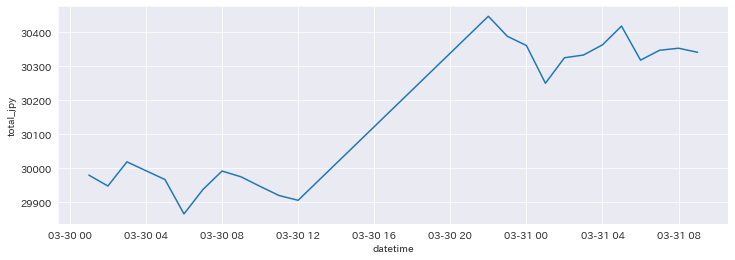

In [10]:
sns.lineplot(data=df_day, x='datetime', y="total_jpy")

<AxesSubplot:xlabel='datetime', ylabel='total_jpy'>

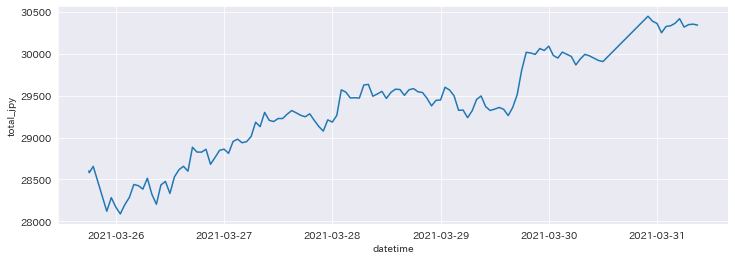

In [11]:
df_recent = total_df.tail(24*10)
sns.lineplot(data=df_recent, x='datetime', y="total_jpy")

In [12]:
groupby = df_recent.groupby("date")
df_days = pd.DataFrame()
df_days["total_jpy"] = round(groupby["total_jpy"].mean(), 3)

In [13]:
df_days.tail(10)

,total_jpy
date,
2021-03-25,28448.600
2021-03-26,28515.458
2021-03-27,29137.125
2021-03-28,29499.458
2021-03-29,29544.000
2021-03-30,30025.067
2021-03-31,30340.900


<AxesSubplot:xlabel='date', ylabel='total_jpy'>

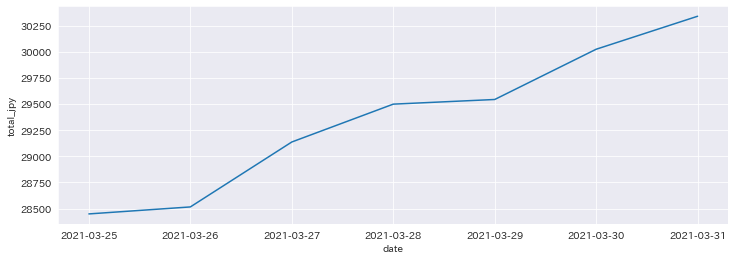

In [14]:
df_days["date"] = df_days.index
sns.lineplot(data=df_days, x='date', y='total_jpy')

## 週次レポート

In [15]:
groupby = total_df.groupby('year_and_wom')
df_by_week = pd.DataFrame()
df_by_week["total_jpy"] = round(groupby["total_jpy"].mean(), 3)

In [16]:
df_by_week

,total_jpy
year_and_wom,
2021-W12,29011.584
2021-W13,29853.898


<AxesSubplot:xlabel='year_and_wom', ylabel='total_jpy'>

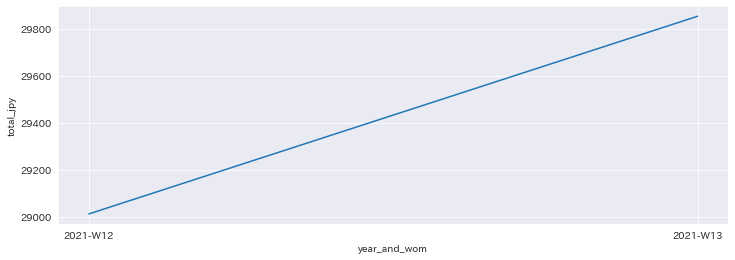

In [17]:
df_by_week["year_and_wom"] = df_by_week.index
sns.lineplot(data=df_by_week, x='year_and_wom', y='total_jpy')

## 月次レポート

In [18]:
groupby = total_df.groupby('year_and_month')
df_by_month = pd.DataFrame()
df_by_month["total_jpy"] = round(groupby["total_jpy"].mean(), 3)

In [19]:
df_by_month

,total_jpy
year_and_month,
2021-03,29339.151


<AxesSubplot:xlabel='year_and_month', ylabel='total_jpy'>

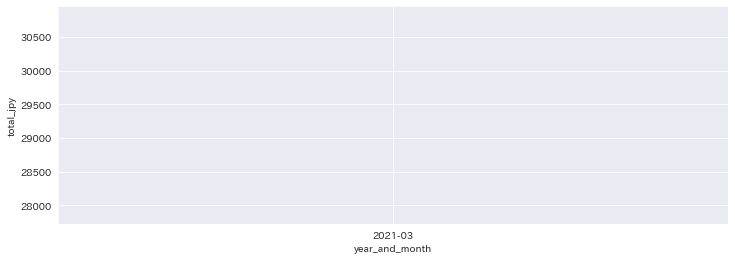

In [20]:
df_by_month["year_and_month"] = df_by_month.index
sns.lineplot(data=df_by_month, x='year_and_month', y='total_jpy')